# Analysis on Seoul Bike Demand  

## Introduction:
The current digital era is going through rapid and fast changes with the technological revolutions and advancements. The digital development has motivated and enabled many Opportunities in the shared economy that has been evolving in many aspects including shared transportation like shared car rides or rentals (shared ride like Uber and lyft and shared car rentals like Zipcar and Turo), bike sharing system and scooter sharing system (rent a bike or scooter from a location and drop it in any available Different location using an app). Bike sharing services form an important part of the current shared economy and has been growing, Especially in East Asian countries like China and South Korea as well as in Europe. Bike sharing had its first success in France and then started to spread out into different cultures. cycling as a method of transportation was not popular in South Korea until they have introduced the bike sharing service for the first time in 2007 when Seoul announced their plans to start a program like France. Nowadays, Bike sharing is having a great success in South Korea and forming a significant share of transportation in the city that reduced automobile transportation and as a result reduced pollution and automobile emissions.

## Question  
What is the causal effect of weather conditions and holidays on bike sharing service demand? Do Seoul residents use rental bikes for leisure or for work and school ? 

## Objective: 
The increased demand for the shared bike service, leads to the importance to analyze the market to ensure stable demand and operate efficiently. The goal of this project is to perform causal inference analysis to determine the effect of weather different Parameters, Season, and holidays on bikes demand in Seoul and how to utilize the obtained results to stabilize supply and minimize required maintenance effect on supply. 
  
Types of Maintenance:
* Emergency and Breakdown Maintenance: to be fixed immediately.  
* Corrective and Preventive Maintenance:  
    1- Fast Maintenance: doesn’t Require time to perform  
    2- Longer Time Maintenance: Requires time to perform 

## Related Works

There are two main related papers focused on Seoul shared bike demand:

1- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020  
  
In this paper, authors study the data of Seoul Bike and Capital Bikeshare program data to test and evaluate different prediction models to find the best bike sharing demand prediction model.  
  
* Tested models are:  
1- CUBIST: a rule-based model.  
2- RRF: Regularized Random Forest.  
3- CART: Classification and Regression Trees.  
4- KNN: K Nearest Neighbor.  
5- CIT: Conditional Inference Tree.    
    
* Evaluation Indices:  
1- R-squared($R^2$).  
2- Root Mean Squared Error.  
3- MAE: Mean Absolute Error.  
4- Coefficient of Variation: measure the prediction performance of the regression models.  
  
    Results:  
Obtained results showed that CUBIST is the best prediction model that improved $R^2$, RMSE, MAE and
CV compared to other models in both datasets.

2- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020  
  
In this paper, authors explore and study different prediction models for the bike sharing demand using data of Seoul Bike rental service (data in interest for this project) by employing data mining technique to achieve the best results.
  
* Tested models:  
1- Linear Regression.  
2- Gradient Boosting Machine.  
3- Support Vector Machine (Radial Basis Function Kernel).  
4- Boosted Trees.  
5- Extreme Gradient Boosting Trees.     
    
* Evaluation Indices:  
1- R-squared ($R^2$).  
2- Root Mean Squared Error.  
3- MAE: Mean Absolute Error.  
4- Coefficient of Variation: measure the prediction performance of the regression models.  
  
    Results:  
Obtained results showed that Gradient Boosting Machine technique is the best prediction model with highest $R^2$ value of 0.96 in the training set and 0.92 in the test set.

## Packages 

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz as gr
from statsmodels.formula.api import ols

## Functions

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# append path from where we'll import packages
import sys
sys.path.append('/Users/malshlash/Google Drive/Python/Final_project')
import my_functions as mf # import functions from helper file

## Data

### Source   
  
UCI Machine Learning Repository: Seoul Bike Sharing Demand Data Set  
https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

### Relevant Papers

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020  
[2] Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020

### Importinng Data

In [4]:
data_source = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv" # Define Data Source
data = pd.read_csv(data_source,encoding = "ISO-8859-1") # import data from data source

### Update and Rearrange Data 

Rearrange data by:  
* rename some of the variables   
* Define the format of data variable
* define new variable that might have more meaningful effect:  
    * Sleeping Hours Indicator (Sleeping_Hours): for hours between 10 pm and 7 am
    * Day: Which week of day (Saturday, Sunday ...)  
    * Weekend Indicator: to distinguish from weekends (Yes) from weekdays (No)

In [5]:
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count', 'Temperature(°C)':'Temp', # rename columns
                     'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind', 
                     'Visibility (10m)':'Visibility','Dew point temperature(°C)':'D_P_Temp',
                     'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                     'Snowfall (cm)':'Snowfall', 'Functioning Day':'Func_Day'})

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') # define date format %d/%m/%Y
data['Day'] = pd.Categorical(data['Date'].dt.day_name(),  # create new variable for day 
                             categories=['Monday', 'Tuesday','Wednesday', 
                                         'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

data['Weekend'] = pd.Series(np.where((data['Day'].cat.codes > 4).astype(int)==True 
            , 'Yes', 'No'), data.index) # create new variable for weekend indicator 

data['Sleeping_Hours'] = pd.Series(np.where((data['Hour'] < 7) | (data['Hour'] > 22).astype(int)==True 
            , 'Yes', 'No'), data.index) # create new variable for Sleeping hour Indicator 

data

,Date,Rented_Bike_Count,Hour,Temp,Humidity,Wind,Visibility,D_P_Temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Day,Weekend,Sleeping_Hours
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,No,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,No,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,No,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,No,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,No,No
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,No,No
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,No,No
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,No,No


### Data Description 

Date : year-month-day  
Rented_Bike_Count: Count of bikes rented at each hour  
Hour - Hour of he day (0-24)  
Temp: Temperature in Celsius (°C)  
Humidity: Percentage (%)  
Windspeed: in m/s  
Visibility: 10m  
D_P_Temp: Dew point temperature in Celsius (°C)    
Solar_radiation: in MJ/m2  
Rainfall: in mm  
Snowfall: in cm  
Seasons: Winter, Spring, Summer, Autumn  
Holiday: Holiday or Not holiday  
Func_Day: Yes is Functional hours, No is Non Functional Hours   
Func_Day: Yes is Functional hours, No is Non Functional Hours  
Day: Which week of day (Saturday, Sunday ...)  
Sleeping_Hours: Yes is sleeping hours (between 10 pm and 7 am), No is not sleeping Hours
Weekend : Yes is weekend, No is weekday

### Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented_Bike_Count  8760 non-null   int64         
 2   Hour               8760 non-null   int64         
 3   Temp               8760 non-null   float64       
 4   Humidity           8760 non-null   int64         
 5   Wind               8760 non-null   float64       
 6   Visibility         8760 non-null   int64         
 7   D_P_Temp           8760 non-null   float64       
 8   Solar_Radiation    8760 non-null   float64       
 9   Rainfall           8760 non-null   float64       
 10  Snowfall           8760 non-null   float64       
 11  Seasons            8760 non-null   object        
 12  Holiday            8760 non-null   object        
 13  Func_Day           8760 non-null   object        
 14  Day     

* No missiong data or outliers

### Data Summary Statistics

In [7]:
print("\n Describe data by season:")

print("\n",data[["Seasons","Rented_Bike_Count"]].groupby("Seasons").describe().round(1))

print("\n", data[["Seasons","Rainfall"]].groupby("Seasons").describe().round(2))
print("\n",data[["Seasons","Snowfall" ]].groupby("Seasons").describe().round(2))
print("\n",data[["Seasons","Temp"]].groupby("Seasons").describe().round(2))
print("\n",data[["Seasons","Holiday"]].groupby("Seasons").describe())
print("\n",data[["Seasons","Func_Day"]].groupby("Seasons").describe())


 Describe data by season:

         Rented_Bike_Count                                                  
                    count    mean    std  min    25%    50%     75%     max
Seasons                                                                    
Autumn             2184.0   819.6  651.1  0.0  241.8  763.5  1197.5  3298.0
Spring             2208.0   730.0  621.5  0.0  206.0  583.0  1105.2  3251.0
Summer             2208.0  1034.1  690.2  9.0  526.8  905.5  1442.5  3556.0
Winter             2160.0   225.5  150.4  3.0  110.0  203.0   305.0   937.0

         Rainfall                                      
           count  mean   std  min  25%  50%  75%   max
Seasons                                               
Autumn    2184.0  0.12  0.95  0.0  0.0  0.0  0.0  18.0
Spring    2208.0  0.18  1.20  0.0  0.0  0.0  0.0  35.0
Summer    2208.0  0.25  1.59  0.0  0.0  0.0  0.0  29.5
Winter    2160.0  0.03  0.42  0.0  0.0  0.0  0.0   9.5

         Snowfall                                  

In [8]:
print("\n Describe data by day:")
print("\n",data[["Day","Rented_Bike_Count"]].groupby("Day").describe().round(1))
print("\n Describe data by Hour:")
print("\n",data[["Hour","Rented_Bike_Count"]].groupby("Hour").describe().round(1))
print("\n Describe data by Holiday:")
print("\n",data[["Holiday","Rented_Bike_Count"]].groupby("Holiday").describe().round(1))
print("\n Describe data by weekend:")
print("\n",data[["Weekend","Rented_Bike_Count"]].groupby("Weekend").describe().round(1))
print("\n Describe data by Sleeping Hours:")
print("\n",data[["Sleeping_Hours","Rented_Bike_Count"]].groupby("Sleeping_Hours").describe().round(1))


 Describe data by day:

           Rented_Bike_Count                                                 
                      count   mean    std  min    25%    50%     75%     max
Day                                                                         
Monday               1248.0  730.6  665.0  2.0  186.0  533.0  1099.0  3380.0
Tuesday              1248.0  688.0  652.2  0.0  179.5  485.5  1031.5  3556.0
Wednesday            1248.0  740.3  677.6  0.0  206.8  536.5  1107.2  3384.0
Thursday             1248.0  690.7  641.7  0.0  185.0  495.0  1049.0  3418.0
Friday               1272.0  747.1  658.4  0.0  233.0  566.0  1115.2  3365.0
Saturday             1248.0  709.5  603.9  0.0  219.0  519.0  1076.0  2497.0
Sunday               1248.0  625.2  605.5  0.0  158.8  406.0   936.5  2514.0

 Describe data by Hour:

      Rented_Bike_Count                                                    
                 count    mean     std  min    25%     50%     75%     max
Hour                       

### Graphs 

#### Average per day

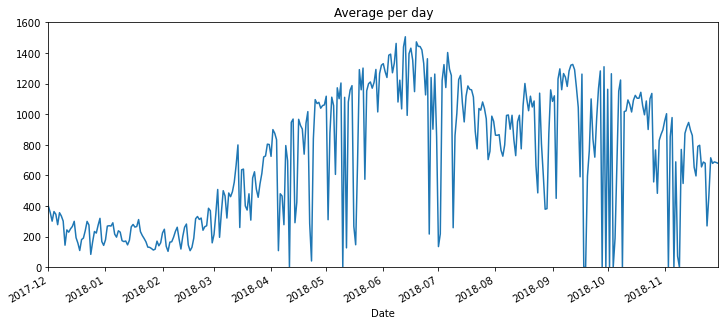

In [9]:
daily = data.groupby(['Date'])['Rented_Bike_Count'].mean() # group data by date
fig1, ax1 = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x=daily.index, y=daily.values, ax=ax1).set_title('Average per day')
fig1.autofmt_xdate()
ax1.set_xlim(min(data['Date']),max(data['Date']))
ax1.set_ylim((0, 1600))
ax1.grid(b=True, which='minor', color='white', lw=0.5)

#### Average per Hour for Weekends and Weekdays

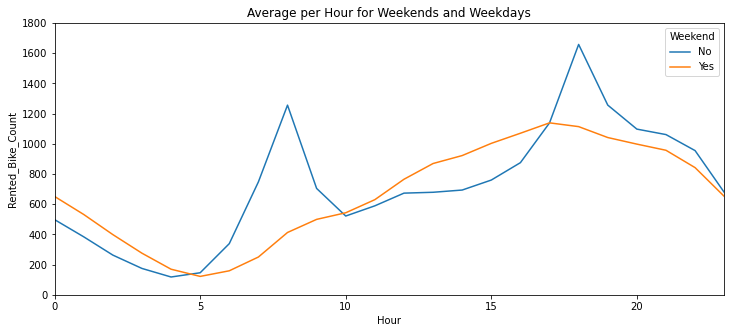

In [10]:
fig2, ax2 = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x='Hour', y='Rented_Bike_Count', data=data, hue='Weekend', ci=None).set_title('Average per Hour for Weekends and Weekdays')
ax2.set_xlim((0,23))
ax2.set_ylim((0, 1800))
ax2.grid(b=True, which='minor', color='white', lw=0.5)

#### Hourly Average by Season

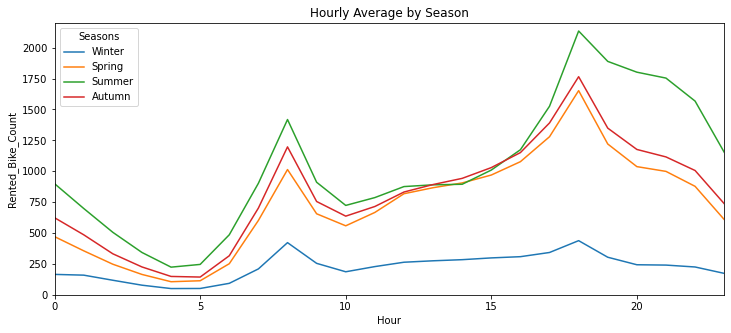

In [11]:
fig3, ax3 = plt.subplots(1,1, figsize=(12,5))
sns.lineplot(x='Hour', y='Rented_Bike_Count', data=data, hue='Seasons', ci=None).set_title('Hourly Average by Season')
ax3.set_xlim((0,23))
ax3.set_ylim((0, 2200))
ax3.grid(b=True, which='minor', color='white', lw=0.5)

#### Hourly Average by Season

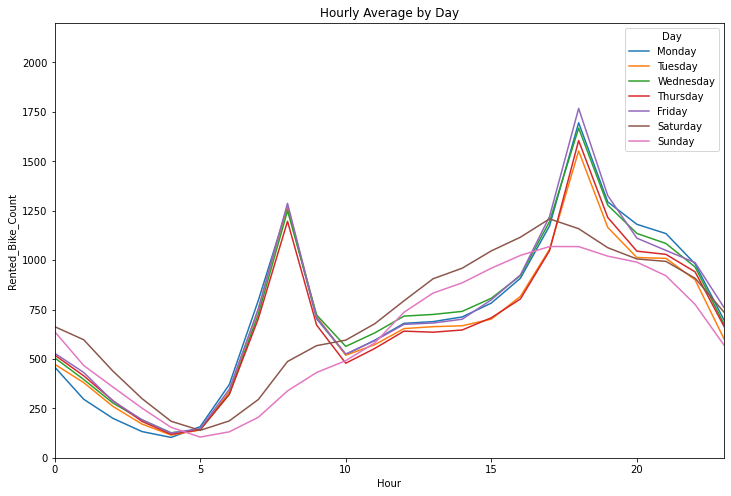

In [12]:
fig8, ax8 = plt.subplots(1,1, figsize=(12,8))
sns.lineplot(x='Hour', y='Rented_Bike_Count', data=data, hue='Day', ci=None).set_title('Hourly Average by Day')
ax8.set_xlim((0,23))
ax8.set_ylim((0, 2200))
ax8.grid(b=True, which='minor', color='white', lw=0.5)

#### Hourly Average per weekday

Text(0.5, 1.0, 'Average per weekday')

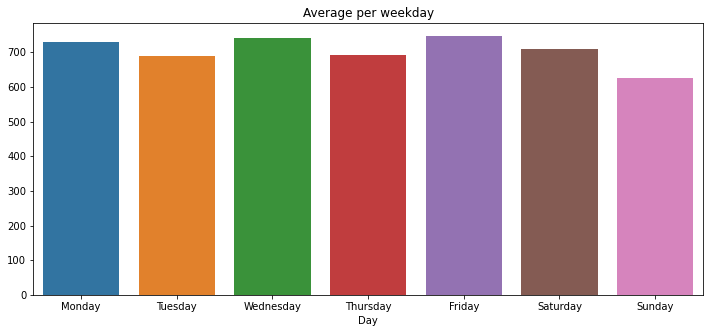

In [13]:
days = data.groupby(['Day'])['Rented_Bike_Count'].mean()
fig5, ax5 = plt.subplots(1,1, figsize=(12,5))
sns.barplot(x=days.index, y=days.values ,ax=ax5).set_title('Average per weekday')

#### Average per Holiday

Text(0.5, 1.0, 'Average per Holiday')

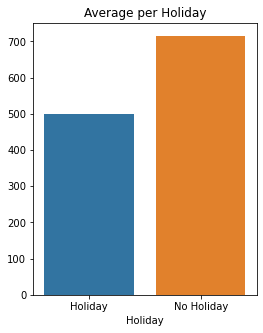

In [14]:
Holidays = data.groupby(['Holiday'])['Rented_Bike_Count'].mean()
fig6, ax6 = plt.subplots(1,1, figsize=(4,5))
sns.barplot(x=Holidays.index, y=Holidays.values ,ax=ax6).set_title('Average per Holiday')

#### Average by sleeping Hour

Text(0.5, 1.0, 'Average by sleeping Hour')

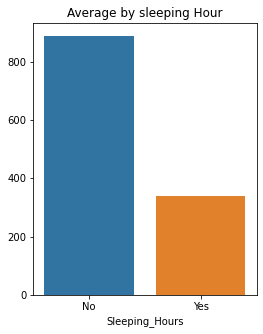

In [15]:
Sleeping = data.groupby(['Sleeping_Hours'])['Rented_Bike_Count'].mean()
fig7, ax7 = plt.subplots(1,1, figsize=(4,5))
sns.barplot(x=Sleeping.index, y=Sleeping.values ,ax=ax7).set_title('Average by sleeping Hour')

### Regression Analysis 

## Model 1 
Includinng the main covariates only and no confounders 

$y_i = \beta_0 + \beta*X_i+e_i$  
  
Where:   
Y is Rented Bikes Count, X includes: $x_1$ as Temperature, $x_2$ as Weeked indicator,  
$x_2$ as Holiday indicator, and $e$: is the risiduals

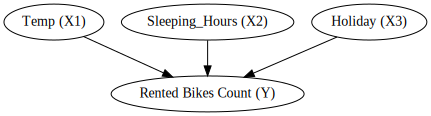

In [16]:
g = gr.Digraph()
g.edge("Temp (X1)", "Rented Bikes Count (Y)")
g.edge("Sleeping_Hours (X2)", "Rented Bikes Count (Y)")
g.edge("Holiday (X3)", "Rented Bikes Count (Y)")
g

In [17]:
model_1 = ols('Rented_Bike_Count ~  Temp + C(Sleeping_Hours) + C(Holiday)', data=data).fit() # regress model

y = data['Rented_Bike_Count'] # define y as rented bikes count
pred1 = model_1.predict() # predict y hat
R2_1 = model_1.rsquared # collect R squared 
model_1.summary() # summary of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1954.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:14:38   Log-Likelihood:                -66855.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8756   BIC:                         1.337e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  388.9895     24.830     15.666      0.000     340.317     437.662
C(Sleeping_Hours)[T.Yes]  -456.5725     11.428    -39.951      0.000    -478.975    -434.170
C(Holiday)[T.No Holiday]   133.9308     24.676      5.428      0.000      85.560     182.301
Temp                        26.4286      0.452     58.502      0.000      25.543      27.314
==============================================================================
Omnibus:                      766.216   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1257.014
Skew:                           0.648   Prob(JB):                    1.10e-273
Kurtosis:                       4.328   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation:

$\beta_0$:  On average, number of rented bikes in a holiday is 388 bikes during working hours conditional on Temperature.  
$\beta_1$: A 1 unit increase in Temperature generates, on average, a 26.4 increase in number of rented bikes per hour.    
$\beta_2$: During Sleeping hours and compared to workinng hours, on average, number of rented bikes per hour is less by 456.6 bikes.    
$\beta_3$: During Holiday and compared to non holiday, on average, number of rented bikes per hour is less by 133.9 bikes   

#### Significance of Estimates

As it can be seen in the obtained regression table. all estimates are statistically significant as p-values are less than 0.05.

#### R-squared, Bias and RMSE

In [18]:
(bias,rmse) = mf.fn_bias_rmse(y,pred1) # calculate bias and RMSE 
print(f' Bias={bias}, \n RMSE={rmse}, \n R2={R2_1}')

 Bias=3.016335025486073e-13, 
 RMSE=499.1610177556059, 
 R2=0.4010164661772152


#### Plot Residuals over Fitted values

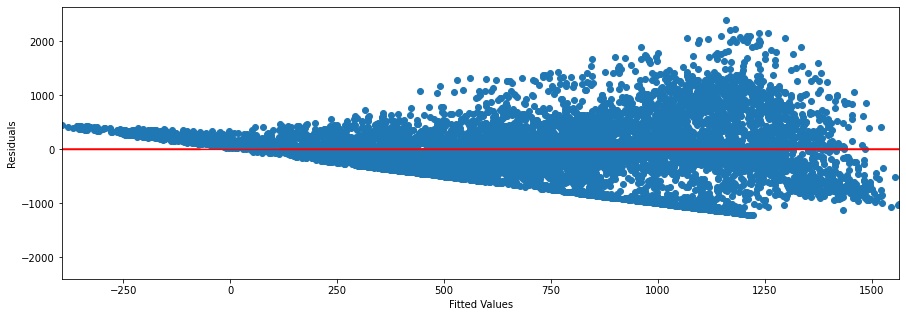

In [19]:
mf.fn_plot_res(y,pred1) 

## Model 2 
Includinng all related covariates and no confounders 

$y_i = \beta_0 + \beta*X_i+e_i$  
  
Where:   
Y is Rented Bikes Count, X includes: $x_1$ as Temperature, $x_2$ as Weeked indicator,  
$x_3$ as Holiday indicator and $x_4$ as Sleeping Hours indicator (10 pm - 7 am)  
$x_5$ as Humidity, $x_6$ as Wind, $x_7$ as Solar Radiation level, $x_8$ as Rainfall  
$x_9$ as Snowfall, $e$: is the risiduals

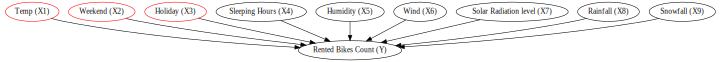

In [20]:
g = gr.Digraph()
g.edge("Temp (X1)", "Rented Bikes Count (Y)")
g.edge("Weekend (X2)", "Rented Bikes Count (Y)")
g.edge("Holiday (X3)", "Rented Bikes Count (Y)")
g.node("Temp (X1)", "Temp (X1)", color="red")
g.node("Weekend (X2)", "Weekend (X2)", color="red")
g.node("Holiday (X3)", "Holiday (X3)", color="red")
g.edge("Sleeping Hours (X4)", "Rented Bikes Count (Y)")
g.edge("Humidity (X5)", "Rented Bikes Count (Y)")
g.edge("Wind (X6)", "Rented Bikes Count (Y)")
g.edge("Solar Radiation level (X7)", "Rented Bikes Count (Y)")
g.edge("Rainfall (X8)", "Rented Bikes Count (Y)")
g.edge("Snowfall (X9)", "Rented Bikes Count (Y)")
g.graph_attr["size"] = "10"

g

In [21]:
model_2 = ols('Rented_Bike_Count ~ Temp + C(Weekend) + C(Holiday) + C(Sleeping_Hours) + Humidity + Wind + Solar_Radiation + Rainfall + Snowfall', data=data).fit()  # regress model
pred2 = model_2.predict() # predict y hat
R2_2 = model_2.rsquared # collect R squared
model_2.summary() # summary of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     931.8
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:14:49   Log-Likelihood:                -66156.
No. Observations:                8760   AIC:                         1.323e+05
Df Residuals:                    8750   BIC:                         1.324e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  896.3441     31.128     28.796      0.000     835.326     957.362
C(Weekend)[T.Yes]          -64.4544     10.929     -5.898      0.000     -85.877     -43.032
C(Holiday)[T.No Holiday]   166.9874     22.828      7.315      0.000     122.239     211.736
C(Sleeping_Hours)[T.Yes]  -466.6778     12.137    -38.450      0.000    -490.470    -442.886
Temp                        34.4696      0.499     69.062      0.000      33.491      35.448
Humidity                    -9.0763      0.316    -28.726      0.000      -9.696      -8.457
Wind                        18.1989      5.277      3.449      0.001       7.855      28.543
Solar_Radiation           -201.4695      7.886    -25.548      0.000    -216.928    -186.011
Rainfall                   -65.9206      4.524    -14.570      0.000     -74.790     -57.052
Snowfall                    12.1060     11.787      1.027      0.304     -10.999      35.211
==============================================================================
Omnibus:                      611.898   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1074.720
Skew:                           0.523   Prob(JB):                    4.24e-234
Kurtosis:                       4.361   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation:

$\beta_0$:  On average, number of rented bikes in a holiday non weekend day is 896.3 bikes during working hours.  
$\beta_1$: A 1 unit increase in Temperature generates, on average, a 34.5 increase in number of rented bikes per hour.    
$\beta_2$: During Weekend and compared to weekdays, on average, number of rented bikes per hour is less by 64.4 bikes.    
$\beta_3$: During Holiday and compared to non holiday, on average, number of rented bikes per hour is less by 167 bikes   
$\beta_4$: During Sleepinng hours and compared to working hours, on average, number of rented bikes per hour is less by 466.7.    
$\beta_5$: A 1 unit increase in Humidity generates, on average, a 9.1 decrease in number of rented bikes per hour.  
$\beta_6$: A 1 unit increase in Wind speed generates, on average, a 18.2 increase in number of rented bikes per hour.  
$\beta_7$: A 1 unit increase in Solar radiationn level generates, on average, a 201.5 decrease in number of rented bikes per hour.  
$\beta_8$: A 1 unit increase in rainfall generates, on average, a 65.9 decrease in number of rented bikes per hour.  
$\beta_9$: A 1 unit increase in snowfall generates, on average, a 12.1 increase in number of rented bikes per hour. 

#### Significance of Estimates

As it can be seen in the obtained regression table. all estimates are statistically significant as p-values are less than 0.05 Except for the snnowfall effect as it has a p-value of 0.304 > 0.05.

#### R-squared, Bias and RMSE

In [22]:
(bias,rmse) = mf.fn_bias_rmse(y,pred2) # Calculate Bias and RMSE
print(f' Bias={bias}, \n RMSE={rmse}, \n R2={R2_2}')

 Bias=2.610378275788469e-12, 
 RMSE=460.8671563347046, 
 R2=0.4893949812827053


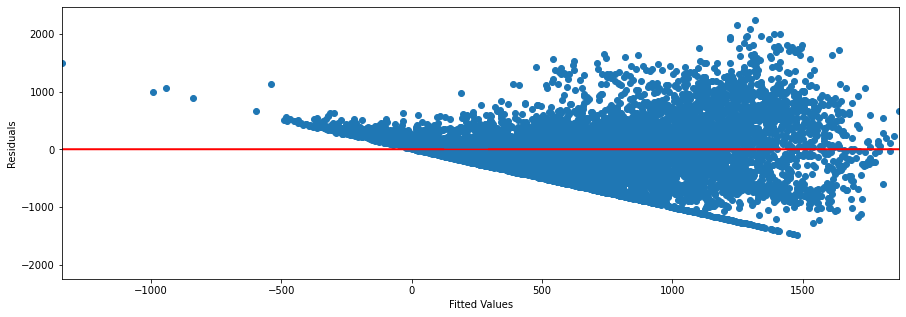

In [23]:
mf.fn_plot_res(y,pred2)

## Model 3
Includinng all related covariates and confounder 

$y_i = \beta_0 + \beta*X_i + \alpha*C  + e_i$  
  
Where:  
Y is Rented Bikes Count, X includes: $x_1$ as Temperature, $x_2$ as Weeked indicator,  
$x_3$ as Holiday indicator and $x_4$ as Sleeping Hours indicator (10 pm - 7 am)  
$x_5$ as Humidity, $x_6$ as Wind, $x_7$ as Solar Radiation level, $x_8$ as Rainfall  
$x_9$ as Snowfall, $C$ is Seasons as the confounder, and $e$: is the risiduals

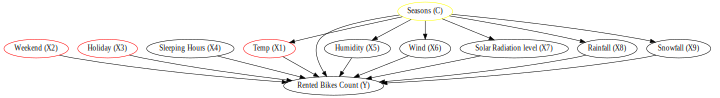

In [24]:
g = gr.Digraph()
g.edge("Temp (X1)", "Rented Bikes Count (Y)")
g.edge("Weekend (X2)", "Rented Bikes Count (Y)")
g.edge("Holiday (X3)", "Rented Bikes Count (Y)")
g.node("Temp (X1)", "Temp (X1)", color="red")
g.node("Weekend (X2)", "Weekend (X2)", color="red")
g.node("Holiday (X3)", "Holiday (X3)", color="red")
g.edge("Sleeping Hours (X4)", "Rented Bikes Count (Y)")
g.edge("Humidity (X5)", "Rented Bikes Count (Y)")
g.edge("Wind (X6)", "Rented Bikes Count (Y)")
g.edge("Solar Radiation level (X7)", "Rented Bikes Count (Y)")
g.edge("Rainfall (X8)", "Rented Bikes Count (Y)")
g.edge("Snowfall (X9)", "Rented Bikes Count (Y)")

g.edge("Seasons (C)", "Temp (X1)")
g.edge("Seasons (C)", "Humidity (X5)")
g.edge("Seasons (C)", "Wind (X6)")
g.edge("Seasons (C)", "Solar Radiation level (X7)")
g.edge("Seasons (C)", "Rainfall (X8)")
g.edge("Seasons (C)", "Snowfall (X9)")
g.node("Seasons (C)", "Seasons (C)", color="yellow")

g.edge("Seasons (C)", "Rented Bikes Count (Y)")

g.graph_attr["size"] = "10"

g

In [25]:
model_3 = ols('Rented_Bike_Count ~ C(Sleeping_Hours) + C(Weekend) + Temp + Humidity + Wind + Solar_Radiation + Rainfall + Snowfall + C(Holiday) + C(Seasons)  ', data=data).fit() #regress model 
pred3 = model_3.predict() # predict y hat
R2_3 = model_3.rsquared # collect R squared
model_3.summary() # summary of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     738.8
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:14:57   Log-Likelihood:                -66035.
No. Observations:                8760   AIC:                         1.321e+05
Df Residuals:                    8747   BIC:                         1.322e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1120.4907     35.050     31.968      0.000    1051.784    1189.198
C(Sleeping_Hours)[T.Yes]  -479.1481     12.082    -39.657      0.000    -502.832    -455.464
C(Weekend)[T.Yes]          -61.5602     10.783     -5.709      0.000     -82.698     -40.422
C(Holiday)[T.No Holiday]   137.8609     22.708      6.071      0.000      93.349     182.373
C(Seasons)[T.Spring]       -36.8256     13.987     -2.633      0.008     -64.243      -9.408
C(Seasons)[T.Summer]       -25.3455     17.502     -1.448      0.148     -59.654       8.963
C(Seasons)[T.Winter]      -284.5682     20.208    -14.082      0.000    -324.181    -244.955
Temp                        27.7955      0.893     31.140      0.000      26.046      29.545
Humidity                    -9.6250      0.316    -30.505      0.000     -10.244      -9.007
Wind                        23.4671      5.251      4.469      0.000      13.174      33.761
Solar_Radiation           -201.4953      7.845    -25.685      0.000    -216.873    -186.117
Rainfall                   -65.6195      4.464    -14.701      0.000     -74.369     -56.870
Snowfall                    32.4781     11.740      2.766      0.006       9.465      55.491
==============================================================================
Omnibus:                      644.622   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.511
Skew:                           0.515   Prob(JB):                    2.11e-271
Kurtosis:                       4.534   Cond. No.                         519.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation:

$\beta_0$:  On average, number of rented bikes in a holiday non weekend day in Fall is 1120.5 bikes during working hours.  
$\beta_1$: A 1 unit increase in Temperature generates, on average, a 27.8 increase in number of rented bikes per hour.    
$\beta_2$: During Weekend and compared to weekdays, on average, number of rented bikes per hour is less by 61.6 bikes.    
$\beta_3$: During Holiday and compared to non holiday, on average, number of rented bikes per hour is less by 137.9 bikes   
$\beta_4$: During Sleepinng hours and compared to working hours, on average, number of rented bikes per hour is less by 479.1.    
$\beta_5$: A 1 unit increase in Humidity generates, on average, a 9.6 decrease in number of rented bikes per hour.  
$\beta_6$: A 1 unit increase in Wind speed generates, on average, a 23.5 increase in number of rented bikes per hour.  
$\beta_7$: A 1 unit increase in Solar radiationn level generates, on average, a 201.5 decrease in number of rented bikes per hour.  
$\beta_8$: A 1 unit increase in rainfall generates, on average, a 65.6 decrease in number of rented bikes per hour.  
$\beta_9$: A 1 unit increase in snowfall generates, on average, a 32.5 increase in number of rented bikes per hour.  
  
$\alpha$:   
1. Spring: During Spring and compared to Fall, on average, number of rented bikes per hour is less by 36.8 bikes.  
2. Summer: During Summer and compared to Fall, on average, number of rented bikes per hour is less by 25.3 bikes.
3. Winter: During Spring and compared to Fall, on average, number of rented bikes per hour is less by 284.6 bikes.



#### Significance of Estimates

As it can be seen in the obtained regression table. all estimates are statistically significant as p-values are less than 0.05 Except for Summer season as it has a p-value of 0.148 > 0.05.

#### R-squared, Bias and RMSE

In [26]:
(bias,rmse) = mf.fn_bias_rmse(y,pred3) # calculate Bias and RMSE
print(f' Bias={bias}, \n RMSE={rmse}, \n R2={R2_3}')

 Bias=-7.677754931062562e-12, 
 RMSE=454.5255913351992, 
 R2=0.503350226629111


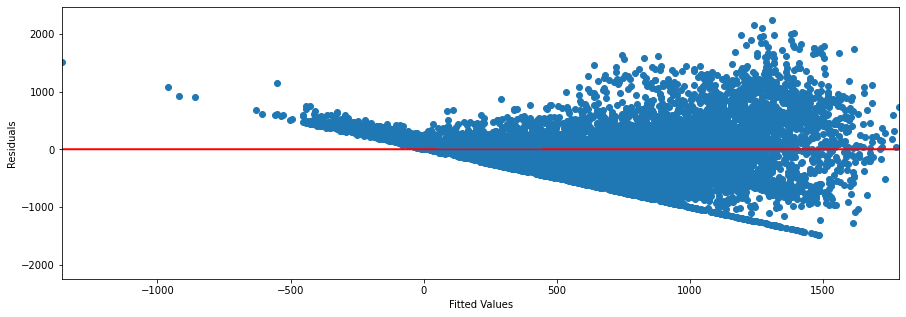

In [27]:
mf.fn_plot_res(y,pred3)

# Findings

### Main Findings

The obtained results reflect the high effect of weather conditions on the demand of rented bikes. As weather gets colder the demand decreases significantly (as temperatures fall) and it can be noticed that winter has the lowest average demand during the year. However, snowfall has a positive effect relatively and I believe this can be due to the difficulty of driving a car and high traffic that lower the public trasportation efficiency during snowfall. Moreover, It has been noticed that holidays and weekends cause demand to decrease as during holidays ,on average, number of rennted bikes is less by about 138 bikes per hour and during weekends ,on average, number of rennted bikes is less by about 61.6 bikes per hour which indicates that residents of Seoul are using the rented bikes service mainly for work and school more than leisure and a high portion of users are students (Holidays effect). Finally, our findings suggest that maintinance should be performed during sleeping hours, cold weather(mainly winter), weekends and holidays. However, this is only a high level analysis that can be used for a specific analysis model along with each maintenance type data for an efficient scheduling for maintenance.

### Robustness of models

The obtained results found to be robustness as it is statistically significant except for the highlited summer indicator in model 3 and snowfall in model 2. Also, the plotted graphs for the residuals over fitted values does not Indicate heteroskedasticity. Also, calculated Bias, RMSE and R squared indicate a good performance of the OLS model. However, other models can perform better for produtive purposses as it has been found in related papers highlited above.

# Conclusion

In conclusion, the obtained results are very descriptive for the causal effect of weather, weekends and holidays on the demand of rented bikes as it affects people need and desire for the service. Also, having a descriptive variables like sleeping hours indicator gave the models more descriptive power and meaningful interpretation that has been found much better than a categorical or continues variable by hour (0 - 23 hours per day). So, it is important to know how to trasform available data to ease and improve analysis and achieve the best descriptive results. Moreover, Maintenance costs service provider a significant part of the operational expenses and might cause loss of potential users. Also, I believe collecting data on users demographic information like age and gender will add a great descriptive power to the model. So, I recommend utilizing the obtained results and the main findings of this project for a specific analysis model along with each maintenance type data for an efficient and dynamic scheduling for maintenance.